In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

matplotlib.rcParams.update({'font.size': 14})

In [2]:
qdf = pd.read_csv("quic_cycles.csv")
qdf["total"] = qdf.sum(axis=1)
qdf.head()

,Identification of unencrypted headers,QUIC header protection removal,Deobfuscation of TLS Client Hello,SNI Extraction from TLS Client Hello,total
0,75707,276889,234061,22338,608995
1,51712,207991,207008,30696,497407
2,49937,204476,197531,21405,473349
3,50268,200404,193064,20987,464723
4,49137,203873,209388,23712,486110


In [3]:
tdf = pd.read_csv("tcp_cycles.csv")
tdf["total"] = tdf.sum(axis=1)
tdf.head()

,Identification of various headers till the start of TLS client hello,SNI Extraction from TLS Client Hello,total
0,41817,19412,61229
1,36671,13934,50605
2,32605,22883,55488
3,34905,19447,54352
4,33166,12157,45323


In [4]:
from matplotlib.ticker import FormatStrFormatter, LogFormatterMathtext
import matplotlib.ticker as mticker

class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)


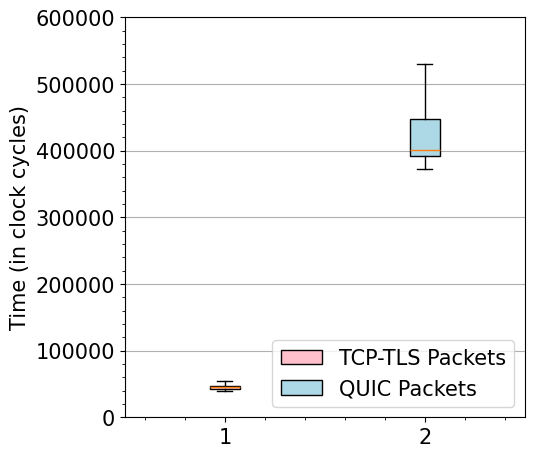

In [5]:
tcp_total = tdf["total"]
quic_total = qdf["total"]

# tcp_total = np.log10(tcp_total)
# quic_total = np.log10(quic_total)

data = [tcp_total, quic_total]
 
fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
colors = ['pink', 'lightblue']

ax = fig.add_axes([0, 0, 1, 1])

xticks = []
ax.set_xticklabels(xticks)

ax.set_ylabel("Time (in clock cycles)")
ax.set_ylim([0, 6e5])
# ax.set_yticks([100000])#
ax.grid(axis="y")
# ax.grid(axis="y", which="minor")
ax.tick_params(axis='y', which='minor', labelsize=11)
# ax.tick_params(axis='y', which='major', labelsize=11)

# ax.set_yscale("log")
# ax.yaxis.set_minor_formatter(MathTextSciFormatter("%1.0e"))
# ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))

ax.minorticks_on()
bp = ax.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
labels = ["TCP-TLS Packets", "QUIC Packets"]
ax.legend([bp["boxes"][0], bp["boxes"][1]], labels, loc="lower right")

plt.savefig('total_box.pdf',bbox_inches='tight', dpi=150)
plt.show()

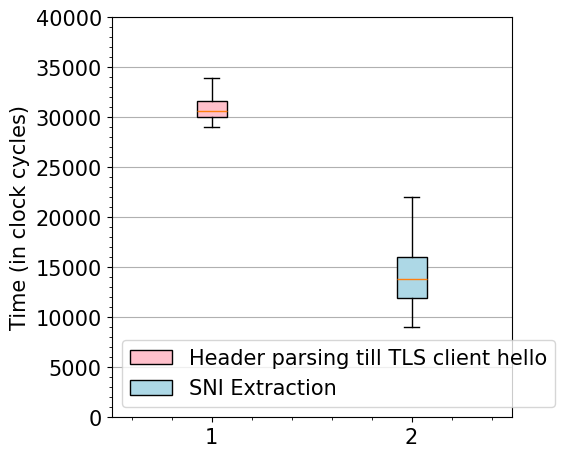

In [6]:
tcp_identify = tdf["Identification of various headers till the start of TLS client hello"]
tcp_sni = tdf["SNI Extraction from TLS Client Hello"]

# quic_total = qdf["total"]

data = [tcp_identify, tcp_sni]
 
fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
colors = ['pink', 'lightblue']

ax = fig.add_axes([0, 0, 1, 1])

xticks = []
ax.set_xticklabels(xticks)
ax.grid(axis="y")
ax.set_ylim([0, 4e4])
# ax.grid(axis="y", which="minor")
ax.minorticks_on()
ax.set_ylabel("Time (in clock cycles)")
# ax.set_yscale('log')
# ax.yaxis.set_minor_formatter(MathTextSciFormatter("%1.0e"))
# ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
bp = ax.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
label = ["Header parsing till TLS client hello", "SNI Extraction"]

ax.legend([bp["boxes"][0], bp["boxes"][1]], label, loc="best", )
        #   bbox_to_anchor=(1.0, 1.0))
plt.savefig('tcp_box.pdf',bbox_inches='tight', dpi=150)
plt.show()

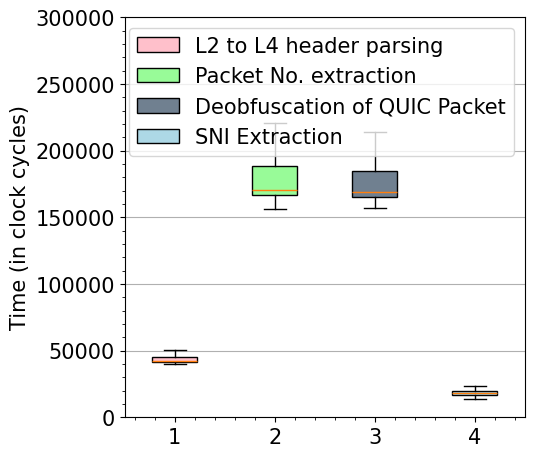

In [7]:
data = qdf.drop(["total"], axis=1)

fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
colors = ['pink',"palegreen", "slategrey", "lightblue"]

ax = fig.add_axes([0, 0, 1, 1])

xticks = []
ax.set_xticklabels(xticks)
ax.grid(axis="y")
# ax.grid(axis="y", which="minor")
ax.minorticks_on()
ax.set_ylabel("Time (in clock cycles)")
ax.set_ylim([0, 3e5])
# ax.set_yscale('log')
# ax.yaxis.set_minor_formatter(MathTextSciFormatter("%1.0e"))
# ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
bp = ax.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
label = [
        "L2 to L4 header parsing",
        "Packet No. extraction",
        "Deobfuscation of QUIC Packet",
        "SNI Extraction"
]
ax.legend([bp["boxes"][0], bp["boxes"][1], bp["boxes"][2], bp["boxes"][3]], label, loc="best")
plt.savefig('quic_box.pdf',bbox_inches='tight', dpi=150)
plt.show()